In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. # makes the range [0,1]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[3]]

'Dress'

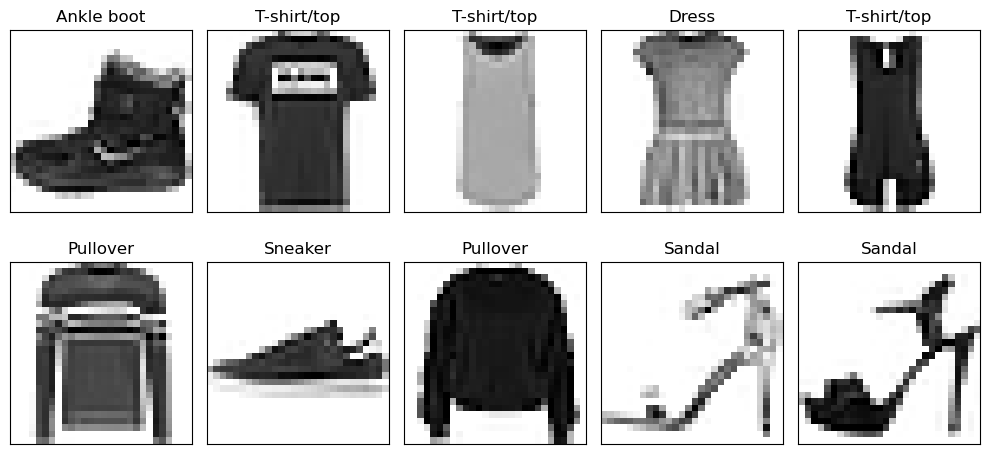

In [10]:
# dataset visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns
    plt.xticks([])  # remove x ticks
    plt.yticks([])  # remove y ticks
    plt.grid(False)  # remove grid
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # show image in grayscale
    plt.title(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [11]:
# Checking if the dataset is inbalanced
labels, counts = np.unique(y_train, return_counts=True)

for lable, count in zip(labels, counts):
    print(f"{class_names[lable]}: {count}")

T-shirt/top: 5479
Trouser: 5503
Pullover: 5510
Dress: 5492
Coat: 5473
Sandal: 5497
Shirt: 5533
Sneaker: 5550
Bag: 5485
Ankle boot: 5478


In [12]:
tf.random.set_seed(42) #making sure we get the same random weights each time we run the code 

model = tf.keras.Sequential([  #simplist NN in Keras, it's a single stack of layers connected sequentially
tf.keras.layers.Flatten(input_shape=[28, 28]), #input layer, will make the shape [32, 784] instead of [32, 28, 28]
tf.keras.layers.Dense(300, activation="relu"), 
tf.keras.layers.Dense(100, activation="relu"), 
tf.keras.layers.Dense(10, activation="softmax")
 ])

model.summary()

c:\Users\samam\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
hidden1 = model.layers[1]

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04942149,  0.06423268,  0.04005388, ..., -0.03409134,
         0.04109249,  0.00585274],
       [ 0.03614474, -0.00177774,  0.03732676, ..., -0.06129768,
         0.06928191, -0.05593476],
       [-0.04413129,  0.0213664 ,  0.01707178, ...,  0.02921753,
         0.07408443,  0.04079855],
       ...,
       [ 0.04221086,  0.07333496, -0.03247803, ...,  0.04964763,
         0.01764587, -0.00905787],
       [-0.0138956 ,  0.00408492,  0.04191487, ..., -0.02873976,
         0.01892357, -0.03520804],
       [-0.06863741,  0.01796752,  0.02456686, ...,  0.02249738,
         0.05567257, -0.04004157]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
model.compile(loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"])